In [1]:
#HW 3

In [2]:
#RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT'] 
#START_DATE = '2018-01-01' 
#END_DATE = '2018-12-31'


Import libraries :

In [3]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
!pip install pyfolio
import pyfolio as pf
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=f0db47421f389b8952c126f8eef13197a96ede567feb811ee60848f4d08604fb
  Stored in directory: /home/codespace/.cache/pip/wheels/24/0d/1f/8b712eded61e2d5c164323efa9cacf923cde0bf70408e1acec
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=068ca6983fa5472fce60264b076e9dc27d30173868da7ce7f99ced7b36c19105
  Stored in directory: /home/codespace/.cache/pip/wheels/36/32/69/06f75dbcc8a1a3a8dc6b5fa80ead9c221a0331c931a68b3884
Successfully built pyfolio empyrical


/home/codespace/.python/current/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Parameters :

In [4]:
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT']
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

N_DAYS = 252
N_PORTFOLIOS = 10**5
n_assets = len(RISKY_ASSETS)

np.random.seed(42)
asset_weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
asset_weights /= np.sum(asset_weights, axis=1)[:,np.newaxis]

DDL of stocks prices :

In [5]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')

[*********************100%***********************]  3 of 3 completed
Downloaded 250 rows of data.


Asset returns :

In [6]:
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [7]:
returns_df

,AAPL,IBM,MSFT
Date,,,
2018-01-03,-0.000174,0.027488,0.004654
2018-01-04,0.004645,0.020254,0.008801
2018-01-05,0.011385,0.004886,0.012398
2018-01-08,-0.003714,0.006031,0.001021
2018-01-09,-0.000115,0.002202,-0.000680
...,...,...,...
2018-12-21,-0.038896,-0.018404,-0.032312
2018-12-24,-0.025874,-0.030377,-0.041739
2018-12-26,0.070422,0.035512,0.068310


Portfolio return :

In [8]:
portfolio_returns = np.dot(asset_weights,avg_returns)

portfolio_volatility = []
for i in range(0, len(asset_weights)): 
    portfolio_volatility.append(np.sqrt(np.dot(asset_weights[i].T, 
                                      np.dot(cov_mat, asset_weights[i]))))
  

portfolio_volatility = np.array(portfolio_volatility) 
portfolio_sharpe_ratio = portfolio_returns / portfolio_volatility 

In [9]:
portfolio_returns

array([-0.0418399 , -0.0320987 , -0.05278649, ..., -0.04892747,
        0.05020644,  0.08204617])

Dataframe with all data :

In [10]:
portfolio_results_df = pd.DataFrame({'returns': portfolio_returns, 
                                 'volatility': portfolio_volatility, 
                                 'sharpe_ratio': portfolio_sharpe_ratio})

portfolio_results_df 

,returns,volatility,sharpe_ratio
0,-0.041840,0.229741,-0.182118
1,-0.032099,0.250965,-0.127901
2,-0.052786,0.232481,-0.227057
3,0.101938,0.262020,0.389046
4,-0.038378,0.251882,-0.152364
...,...,...,...
99995,0.061836,0.245998,0.251370
99996,0.049962,0.250287,0.199619
99997,-0.048927,0.229516,-0.213177
99998,0.050206,0.256902,0.195431


In [11]:
N_POINTS = 100 
portfolio_volatility_efronteer = []
indices_to_skip = []

portfolio_returns_efronteer = np.linspace(portfolio_results_df.returns.min(), 
                            portfolio_results_df.returns.max(), 
                            N_POINTS)

portfolio_returns_efronteer = np.round(portfolio_returns_efronteer, 2)
portfolio_returns = np.round(portfolio_returns, 2)

for point_index in range(N_POINTS): 
    if portfolio_returns_efronteer[point_index] not in portfolio_returns: 
         indices_to_skip.append(point_index) 
         continue 
    matched_ind = np.where(portfolio_returns == portfolio_returns_efronteer[point_index]) 
    portfolio_volatility_efronteer.append(np.min(portfolio_volatility[matched_ind]))

portfolio_returns_efronteer = np.delete(portfolio_returns_efronteer, indices_to_skip)

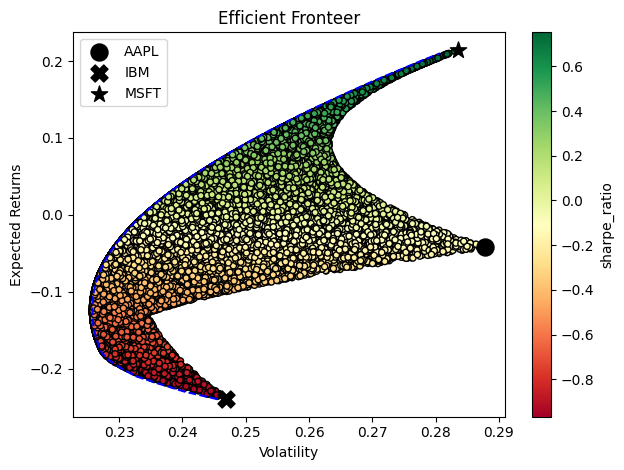

In [12]:
MARKS = ['o', 'X', '*']

fig, ax = plt.subplots()
portfolio_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Fronteer')
ax.plot(portfolio_volatility_efronteer, portfolio_returns_efronteer, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=RISKY_ASSETS[asset_index])
ax.legend()

plt.tight_layout()
plt.show()


In [13]:
#-----------------------------------------------------------------#

In [14]:
max_sharpe_ind = np.argmax(portfolio_results_df.sharpe_ratio)

max_sharpe_portfolio = portfolio_results_df.loc[max_sharpe_ind]

min_volatility_index = np.argmin(portfolio_results_df.volatility)

min_volatility_portfolio = portfolio_results_df.loc[min_volatility_index]


In [15]:
max_sharpe_portfolio

returns         0.212797
volatility      0.282990
sharpe_ratio    0.751958
Name: 22634, dtype: float64

In [16]:
print(f'APPL : {asset_weights[22634][0]*100:.2f}%,IBM : {asset_weights[22634][1]*100:.2f}%, MSFT : {asset_weights[22634][2]*100:.2f}%')

APPL : 0.19%,IBM : 0.29%, MSFT : 99.52%


In [17]:
min_volatility_portfolio

returns        -0.123841
volatility      0.225804
sharpe_ratio   -0.548443
Name: 51075, dtype: float64

In [18]:
print(f'APPL : {asset_weights[51075][0]*100:.2f}%,IBM : {asset_weights[51075][1]*100:.2f}%, MSFT : {asset_weights[51075][2]*100:.2f}%')

APPL : 28.08%,IBM : 58.69%, MSFT : 13.22%


In [19]:
# HW 4 Numerical simulation

In [20]:
#START_DATE = '2018-01-01' 
#END_DATE = '2018-12-31’

**Two portfolios**

In [21]:
max_sharpe_portfolio_return = (returns_df * asset_weights[np.argmax(portfolio_results_df.sharpe_ratio)]).sum(axis = 1)
min_volatility_portfolio_return = (returns_df * asset_weights[np.argmin(portfolio_results_df.volatility)]).sum(axis = 1)
max_sharpe_portfolio_value = (prices_df["Adj Close"] * asset_weights[np.argmax(portfolio_results_df.sharpe_ratio)]).sum(axis = 1)
min_volatility_portfolio_value = (prices_df["Adj Close"] * asset_weights[np.argmin(portfolio_results_df.volatility)]).sum(axis = 1)

**Plotting these portfolios : Max sharpe & Min volatility**

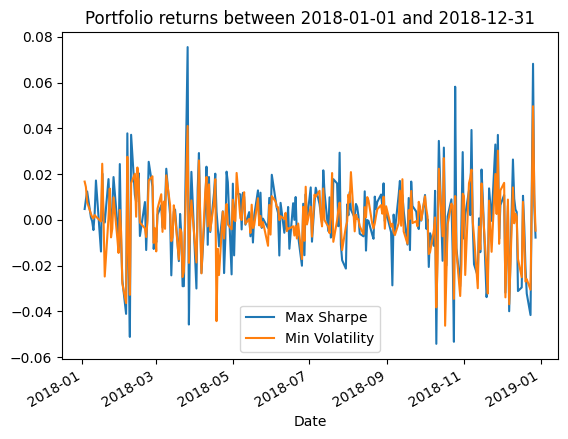

In [22]:
max_sharpe_portfolio_return.plot(label = "Max Sharpe")
min_volatility_portfolio_return.plot(label = "Min Volatility")
plt.legend()
plt.title(f"Portfolio returns between {START_DATE} and {END_DATE}")
plt.show()

**Split data into training and test sets :**

In [23]:
train_max = max_sharpe_portfolio_return["2018-01-01":"2018-10-31"]
test_max = max_sharpe_portfolio_return["2018-11-01":"2018-12-31"]
train_min = min_volatility_portfolio_return["2018-01-01":"2018-10-31"]
test_min = min_volatility_portfolio_return["2018-11-01":"2018-12-31"]


**Parameters of the simulation**

In [24]:
T = len(test_max)
N = len(test_max)

s_0_max = max_sharpe_portfolio_value[train_max.index[-1]]
s_0_min = min_volatility_portfolio_value[train_min.index[-1]]

n_sims = 50

mu_max = train_max.mean()
sigma_max = train_max.std()
mu_min = train_min.mean()
sigma_min = train_min.std()

**Function of the simulation**

In [25]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=90):
  
    np.random.seed(random_seed)

    dt = T/N 
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis =1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)

    return S_t

**Application of the function on Max Sharpe & Min Volatility**

In [26]:
simulation_max_sharpe = simulate_gbm(s_0_max,mu_max,sigma_max,n_sims,T,N)
simulation_min_volatility = simulate_gbm(s_0_min,mu_min,sigma_min,n_sims,T,N)

**Preparation of objects for plotting and Plot**

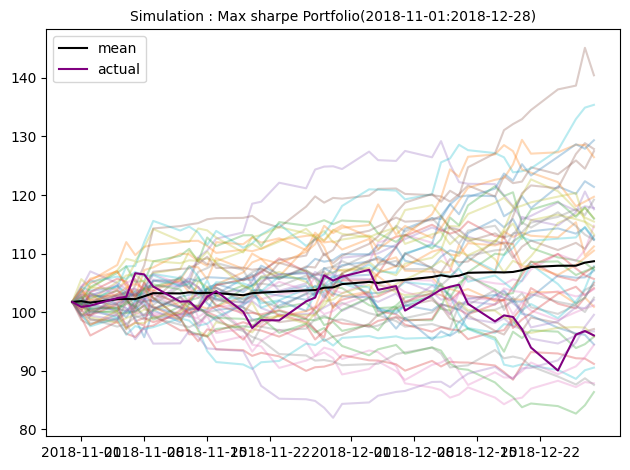

In [27]:
#PREPA MAX
last_train_date = train_max.index[-1].date()
first_test_date = test_max.index[0].date()
last_test_date = test_max.index[-1].date()
plot_title = (f'Simulation : Max sharpe Portfolio'
              f'({first_test_date}:{last_test_date})')

selected_indices = max_sharpe_portfolio_value[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(simulation_max_sharpe), 
                                  index=index)

#PLOT MAX
ax = gbm_simulations_df.plot(alpha=0.3, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='black')
line_2, = ax.plot(index, max_sharpe_portfolio_value[last_train_date:last_test_date], 
                  color='purple')
ax.set_title(plot_title, fontsize=10)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
plt.show()

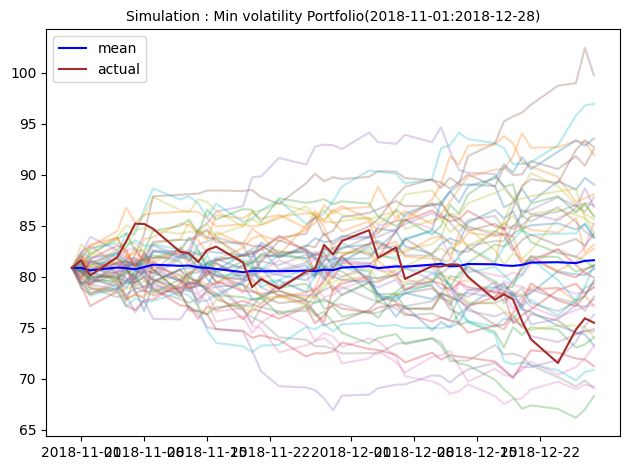

In [28]:
#PREPA MIN
last_train_date = train_min.index[-1].date()
first_test_date = test_min.index[0].date()
last_test_date = test_min.index[-1].date()
plot_title = (f'Simulation : Min volatility Portfolio'
              f'({first_test_date}:{last_test_date})')

selected_indices = min_volatility_portfolio_value[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(simulation_min_volatility), 
                                  index=index)

#PLOT MIN
ax = gbm_simulations_df.plot(alpha=0.3, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='blue')
line_2, = ax.plot(index, min_volatility_portfolio_value[last_train_date:last_test_date], 
                  color='brown')
ax.set_title(plot_title, fontsize=10)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
plt.show()
